<a href="https://colab.research.google.com/github/andre3031/drone-factory-simulation/blob/main/C%C3%B3digo_Final_SIM_DRONE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import simpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

In [ ]:
# Definição dos cenários com tempos de processo
cenarios_parametros = {
    "Cenário 1": {"manutencao": 2.0, "pintura": 1.5, "montagem": 1.1},
    "Cenário 2": {"manutencao": 1.0, "pintura": 1.5, "montagem": 1.1},
    "Cenário 3": {"manutencao": 2.0, "pintura": 1.3, "montagem": 1.1},
    "Cenário 4": {"manutencao": 2.0, "pintura": 1.5, "montagem": 1.0},
    "Cenário 5": {"manutencao": 1.0, "pintura": 1.3, "montagem": 1.0}
}



🔹 Cenário 1 🔹


Product_id,Machine_id,Time_stamp_Ini,Time_stamp_Fim,Simulated_time,Resource
1,Start Body Making,0.0,NaN,NaN,body_maker
1,Start Helice Making,0.0,NaN,NaN,helice_maker
1,Start Painting,0.0,NaN,NaN,painter
1,Start Assembling,0.0,NaN,NaN,assembler
1,End Body Making,0.0,1.0,1.0,body_maker
2,Start Body Making,1.0,NaN,NaN,body_maker
1,End Helice Making,0.0,1.0,1.0,helice_maker
2,Start Helice Making,1.0,NaN,NaN,helice_maker
2,End Body Making,1.0,2.0,2.0,body_maker
3,Start Body Making,2.0,NaN,NaN,body_maker


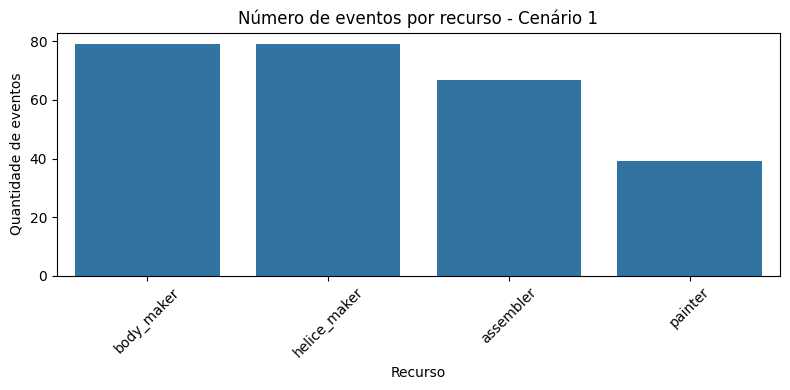


🔹 Cenário 2 🔹


Product_id,Machine_id,Time_stamp_Ini,Time_stamp_Fim,Simulated_time,Resource
1,Start Body Making,0.0,NaN,NaN,body_maker
1,Start Helice Making,0.0,NaN,NaN,helice_maker
1,Start Painting,0.0,NaN,NaN,painter
1,Start Assembling,0.0,NaN,NaN,assembler
1,End Body Making,0.0,1.0,1.0,body_maker
2,Start Body Making,1.0,NaN,NaN,body_maker
1,End Helice Making,0.0,1.0,1.0,helice_maker
2,Start Helice Making,1.0,NaN,NaN,helice_maker
2,End Body Making,1.0,2.0,2.0,body_maker
3,Start Body Making,2.0,NaN,NaN,body_maker


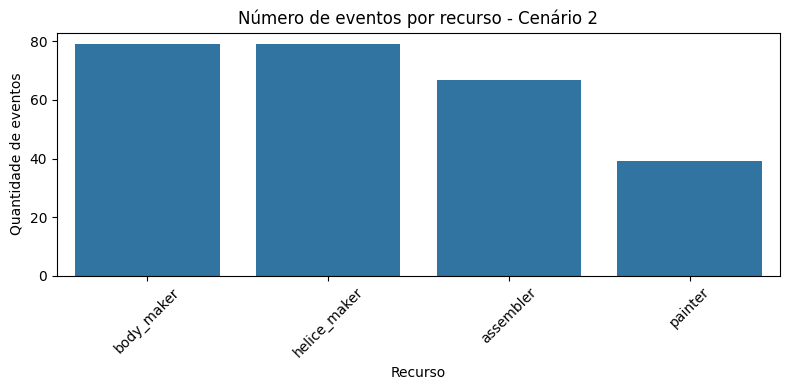


🔹 Cenário 3 🔹


Product_id,Machine_id,Time_stamp_Ini,Time_stamp_Fim,Simulated_time,Resource
1,Start Body Making,0.0,NaN,NaN,body_maker
1,Start Helice Making,0.0,NaN,NaN,helice_maker
1,Start Painting,0.0,NaN,NaN,painter
1,Start Assembling,0.0,NaN,NaN,assembler
1,End Body Making,0.0,1.0,1.0,body_maker
2,Start Body Making,1.0,NaN,NaN,body_maker
1,End Helice Making,0.0,1.0,1.0,helice_maker
2,Start Helice Making,1.0,NaN,NaN,helice_maker
2,End Body Making,1.0,2.0,2.0,body_maker
3,Start Body Making,2.0,NaN,NaN,body_maker


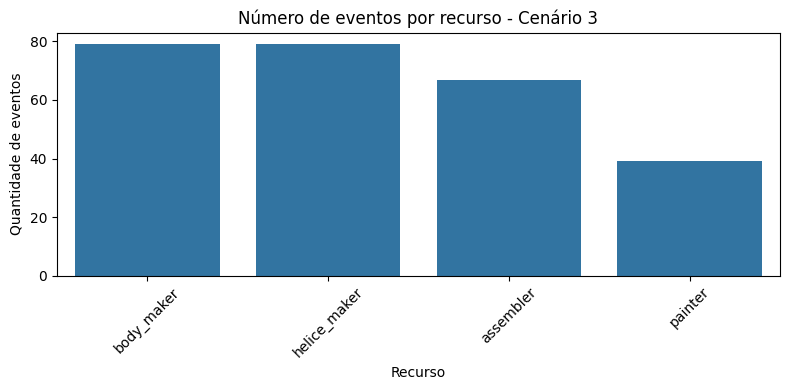


🔹 Cenário 4 🔹


Product_id,Machine_id,Time_stamp_Ini,Time_stamp_Fim,Simulated_time,Resource
1,Start Body Making,0.0,NaN,NaN,body_maker
1,Start Helice Making,0.0,NaN,NaN,helice_maker
1,Start Painting,0.0,NaN,NaN,painter
1,Start Assembling,0.0,NaN,NaN,assembler
1,End Body Making,0.0,1.0,1.0,body_maker
2,Start Body Making,1.0,NaN,NaN,body_maker
1,End Helice Making,0.0,1.0,1.0,helice_maker
2,Start Helice Making,1.0,NaN,NaN,helice_maker
2,End Body Making,1.0,2.0,2.0,body_maker
3,Start Body Making,2.0,NaN,NaN,body_maker


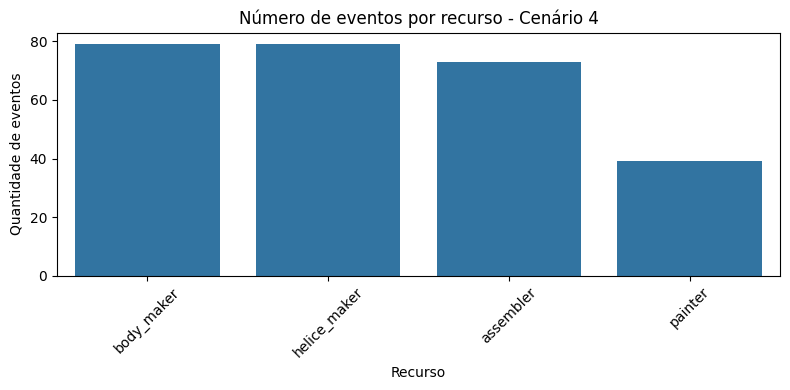


🔹 Cenário 5 🔹


Product_id,Machine_id,Time_stamp_Ini,Time_stamp_Fim,Simulated_time,Resource
1,Start Body Making,0.0,NaN,NaN,body_maker
1,Start Helice Making,0.0,NaN,NaN,helice_maker
1,Start Painting,0.0,NaN,NaN,painter
1,Start Assembling,0.0,NaN,NaN,assembler
1,End Body Making,0.0,1.0,1.0,body_maker
2,Start Body Making,1.0,NaN,NaN,body_maker
1,End Helice Making,0.0,1.0,1.0,helice_maker
2,Start Helice Making,1.0,NaN,NaN,helice_maker
2,End Body Making,1.0,2.0,2.0,body_maker
3,Start Body Making,2.0,NaN,NaN,body_maker


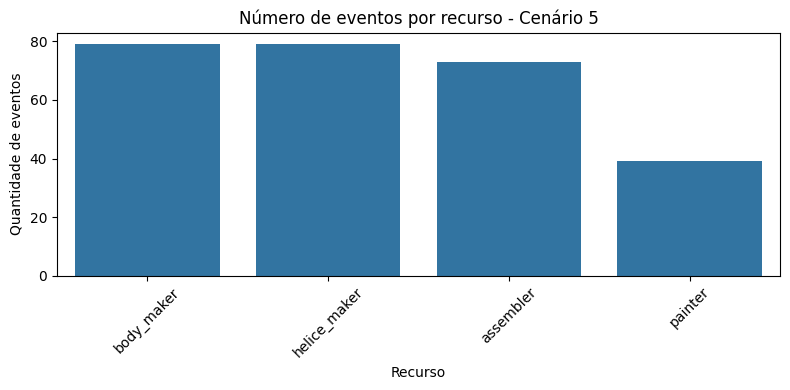

In [ ]:
# Loop para rodar simulações para cada cenário
for nome_cenario, tempos in cenarios_parametros.items():
    print(f"\n🔹 {nome_cenario} 🔹")

    event_log = []  # Reinicia log para cada cenário

    def log_event(product_id, event, time_stamp_ini, time_stamp_fim, resource):
        event_log.append({
            'Product_id': product_id,
            'Machine_id': event,
            'Time_stamp_Ini': time_stamp_ini,
            'Time_stamp_Fim': time_stamp_fim,
            'Simulated_time': time_stamp_fim,
            'Resource': resource
        })

    class Drone_Factory:
        def __init__(self, env):
            self.plastic = simpy.Container(env, capacity=1000, init=500)
            self.electronic = simpy.Container(env, capacity=100, init=100)
            self.first_assembler_body = simpy.Container(env, capacity=100, init=0)
            self.first_assembler_helice = simpy.Container(env, capacity=100, init=0)
            self.second_assembler_body = simpy.Container(env, capacity=200, init=0)
            self.second_assembler_helice = simpy.Container(env, capacity=200, init=0)
            self.dispatch = simpy.Container(env, capacity=500, init=0)

    def body_maker(env, drone_factory):
        case_id = 1
        while True:
            time_stamp_ini = env.now
            log_event(case_id, 'Start Body Making', time_stamp_ini, None, 'body_maker')
            yield drone_factory.plastic.get(1)
            yield env.timeout(1)
            yield drone_factory.first_assembler_body.put(1)
            time_stamp_fim = env.now
            log_event(case_id, 'End Body Making', time_stamp_ini, time_stamp_fim, 'body_maker')
            case_id += 1

    def helice_maker(env, drone_factory):
        case_id = 1
        while True:
            time_stamp_ini = env.now
            log_event(case_id, 'Start Helice Making', time_stamp_ini, None, 'helice_maker')
            yield drone_factory.plastic.get(1)
            yield env.timeout(1)
            yield drone_factory.first_assembler_helice.put(4)
            time_stamp_fim = env.now
            log_event(case_id, 'End Helice Making', time_stamp_ini, time_stamp_fim, 'helice_maker')
            case_id += 1

    def painter(env, drone_factory):
        case_id = 1
        while True:
            time_stamp_ini = env.now
            log_event(case_id, 'Start Painting', time_stamp_ini, None, 'painter')
            yield drone_factory.first_assembler_body.get(2)
            yield drone_factory.first_assembler_helice.get(8)
            yield env.timeout(tempos["pintura"])
            yield drone_factory.second_assembler_helice.put(8)
            yield drone_factory.second_assembler_body.put(2)
            time_stamp_fim = env.now
            log_event(case_id, 'End Painting', time_stamp_ini, time_stamp_fim, 'painter')
            case_id += 1

    def assembler(env, drone_factory):
        case_id = 1
        while True:
            time_stamp_ini = env.now
            log_event(case_id, 'Start Assembling', time_stamp_ini, None, 'assembler')
            yield drone_factory.second_assembler_helice.get(4)
            yield drone_factory.second_assembler_body.get(1)
            yield drone_factory.electronic.get(1)
            yield env.timeout(tempos["montagem"])
            yield drone_factory.dispatch.put(1)
            time_stamp_fim = env.now
            log_event(case_id, 'End Assembling', time_stamp_ini, time_stamp_fim, 'assembler')
            case_id += 1

    # Inicia simulação
    env = simpy.Environment()
    drone_factory = Drone_Factory(env)
    env.process(body_maker(env, drone_factory))
    env.process(helice_maker(env, drone_factory))
    env.process(painter(env, drone_factory))
    env.process(assembler(env, drone_factory))
    env.run(until=40)

    # DataFrame
    event_log_df = pd.DataFrame(event_log)

    # Tabela com rolagem
    html_table = event_log_df.to_html(index=False)
    scrollable_html = f"""
    <div style="max-height: 400px; overflow-y: auto; border: 1px solid #ddd; padding: 5px;">
        {html_table}
    </div>
    """
    display(HTML(scrollable_html))

    # Gráfico por cenário
    plt.figure(figsize=(8, 4))
    sns.countplot(data=event_log_df, x='Resource', order=event_log_df['Resource'].value_counts().index)
    plt.title(f"Número de eventos por recurso - {nome_cenario}")
    plt.xlabel("Recurso")
    plt.ylabel("Quantidade de eventos")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()



🔹 Cenário 1 🔹


Product_id,Machine_id,Time_stamp_Ini,Time_stamp_Fim,Simulated_time,Resource
1,Start Body Making,0.0,NaN,NaN,body_maker
1,Start Helice Making,0.0,NaN,NaN,helice_maker
1,Start Painting,0.0,NaN,NaN,painter
1,Start Assembling,0.0,NaN,NaN,assembler
1,End Body Making,0.0,1.0,1.0,body_maker
2,Start Body Making,1.0,NaN,NaN,body_maker
1,End Helice Making,0.0,1.0,1.0,helice_maker
2,Start Helice Making,1.0,NaN,NaN,helice_maker
2,End Body Making,1.0,2.0,2.0,body_maker
3,Start Body Making,2.0,NaN,NaN,body_maker


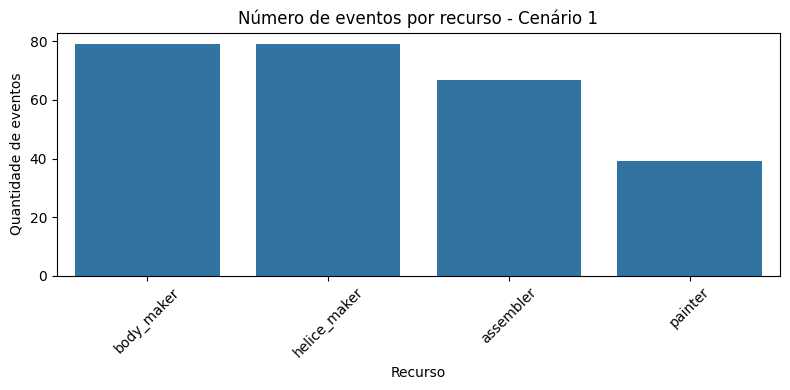


🔹 Cenário 2 🔹


Product_id,Machine_id,Time_stamp_Ini,Time_stamp_Fim,Simulated_time,Resource
1,Start Body Making,0.0,NaN,NaN,body_maker
1,Start Helice Making,0.0,NaN,NaN,helice_maker
1,Start Painting,0.0,NaN,NaN,painter
1,Start Assembling,0.0,NaN,NaN,assembler
1,End Body Making,0.0,1.0,1.0,body_maker
2,Start Body Making,1.0,NaN,NaN,body_maker
1,End Helice Making,0.0,1.0,1.0,helice_maker
2,Start Helice Making,1.0,NaN,NaN,helice_maker
2,End Body Making,1.0,2.0,2.0,body_maker
3,Start Body Making,2.0,NaN,NaN,body_maker


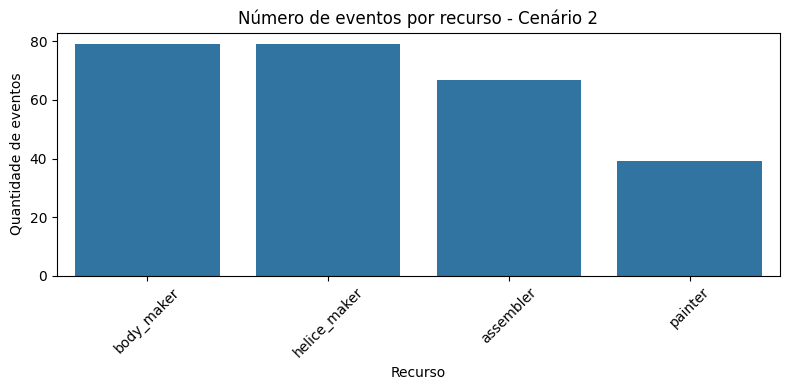


🔹 Cenário 3 🔹


Product_id,Machine_id,Time_stamp_Ini,Time_stamp_Fim,Simulated_time,Resource
1,Start Body Making,0.0,NaN,NaN,body_maker
1,Start Helice Making,0.0,NaN,NaN,helice_maker
1,Start Painting,0.0,NaN,NaN,painter
1,Start Assembling,0.0,NaN,NaN,assembler
1,End Body Making,0.0,1.0,1.0,body_maker
2,Start Body Making,1.0,NaN,NaN,body_maker
1,End Helice Making,0.0,1.0,1.0,helice_maker
2,Start Helice Making,1.0,NaN,NaN,helice_maker
2,End Body Making,1.0,2.0,2.0,body_maker
3,Start Body Making,2.0,NaN,NaN,body_maker


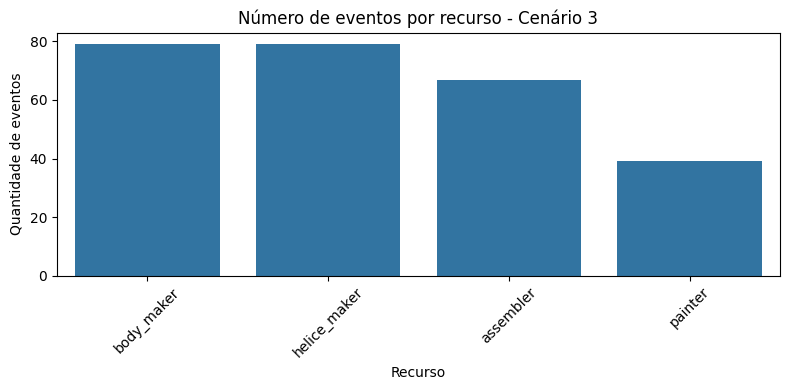


🔹 Cenário 4 🔹


Product_id,Machine_id,Time_stamp_Ini,Time_stamp_Fim,Simulated_time,Resource
1,Start Body Making,0.0,NaN,NaN,body_maker
1,Start Helice Making,0.0,NaN,NaN,helice_maker
1,Start Painting,0.0,NaN,NaN,painter
1,Start Assembling,0.0,NaN,NaN,assembler
1,End Body Making,0.0,1.0,1.0,body_maker
2,Start Body Making,1.0,NaN,NaN,body_maker
1,End Helice Making,0.0,1.0,1.0,helice_maker
2,Start Helice Making,1.0,NaN,NaN,helice_maker
2,End Body Making,1.0,2.0,2.0,body_maker
3,Start Body Making,2.0,NaN,NaN,body_maker


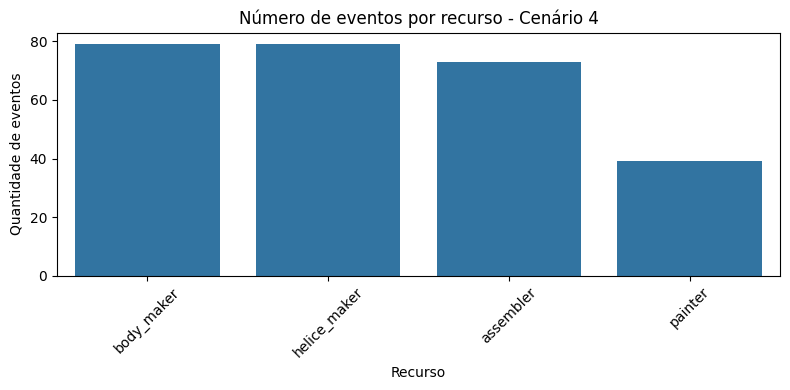


🔹 Cenário 5 🔹


Product_id,Machine_id,Time_stamp_Ini,Time_stamp_Fim,Simulated_time,Resource
1,Start Body Making,0.0,NaN,NaN,body_maker
1,Start Helice Making,0.0,NaN,NaN,helice_maker
1,Start Painting,0.0,NaN,NaN,painter
1,Start Assembling,0.0,NaN,NaN,assembler
1,End Body Making,0.0,1.0,1.0,body_maker
2,Start Body Making,1.0,NaN,NaN,body_maker
1,End Helice Making,0.0,1.0,1.0,helice_maker
2,Start Helice Making,1.0,NaN,NaN,helice_maker
2,End Body Making,1.0,2.0,2.0,body_maker
3,Start Body Making,2.0,NaN,NaN,body_maker


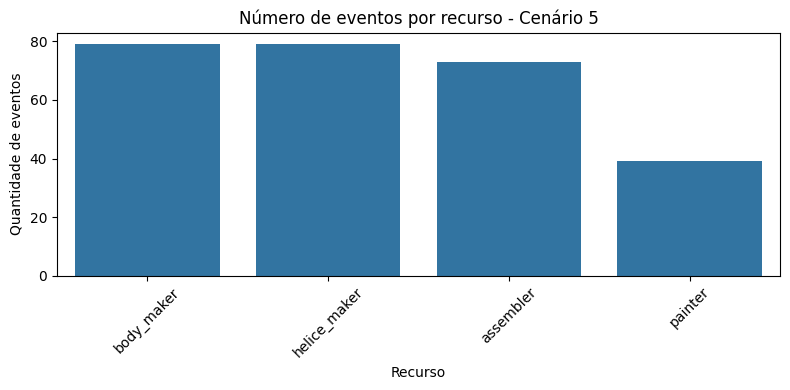

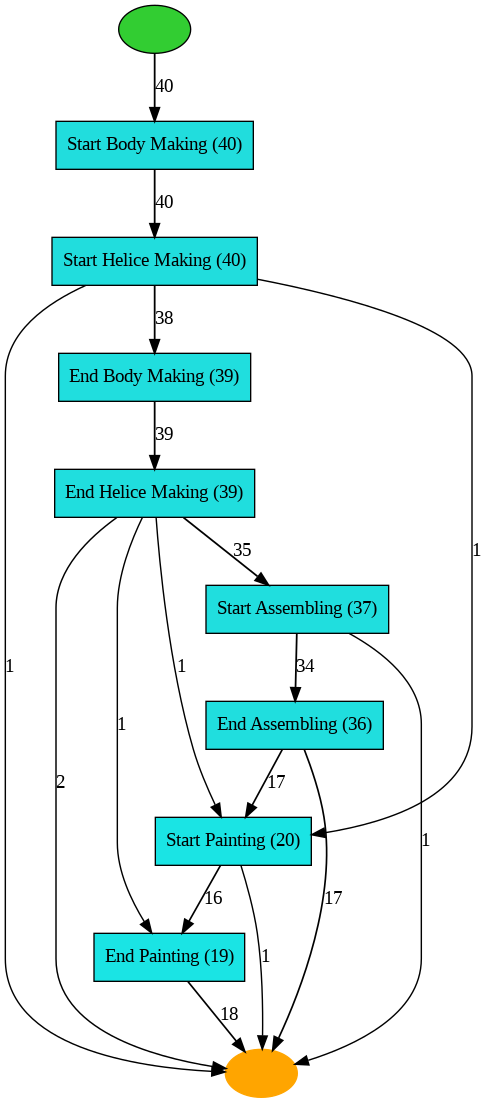

replaying log with TBR, completed traces ::   0%|          | 0/9 [00:00<?, ?it/s]

✔️ Média de fitness das traces conformes: 1.00


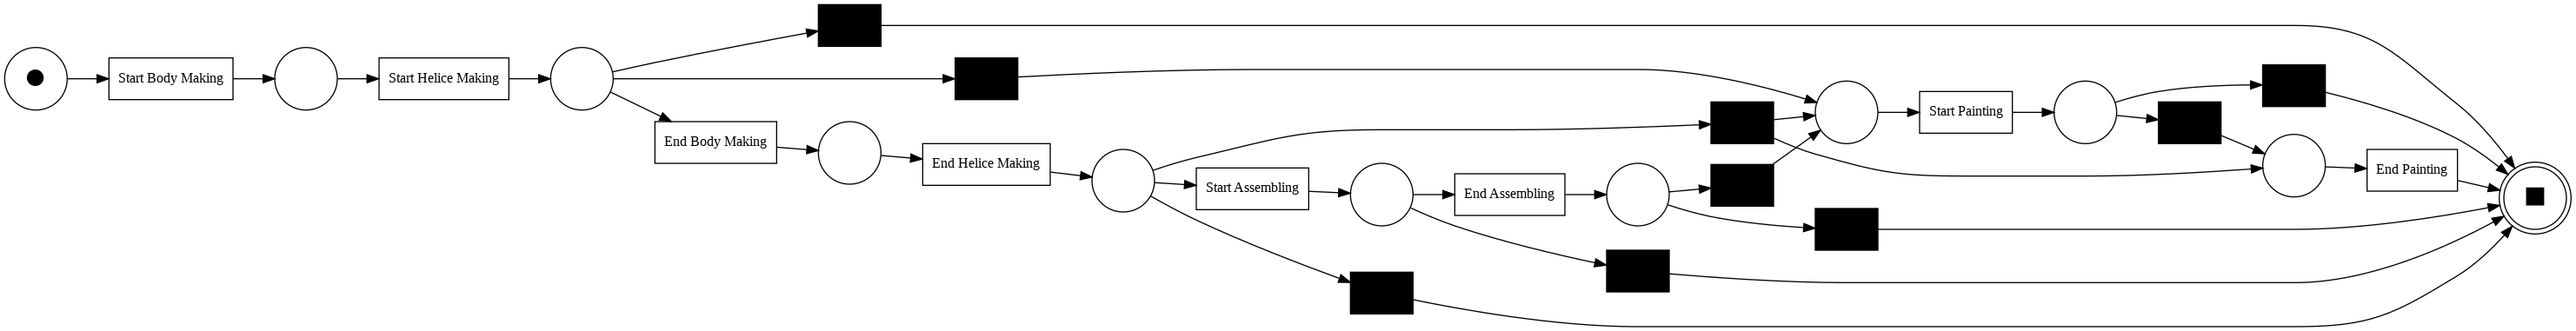

📁 Imagem da rede de Petri salva em: /content/petri_net_conformance.png


In [ ]:
import simpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

# Definição dos cenários com tempos de processo
cenarios_parametros = {
    "Cenário 1": {"manutencao": 2.0, "pintura": 1.5, "montagem": 1.1},
    "Cenário 2": {"manutencao": 1.0, "pintura": 1.5, "montagem": 1.1},
    "Cenário 3": {"manutencao": 2.0, "pintura": 1.3, "montagem": 1.1},
    "Cenário 4": {"manutencao": 2.0, "pintura": 1.5, "montagem": 1.0},
    "Cenário 5": {"manutencao": 1.0, "pintura": 1.3, "montagem": 1.0}
}

# Loop para rodar simulações para cada cenário
for nome_cenario, tempos in cenarios_parametros.items():
    print(f"\n🔹 {nome_cenario} 🔹")

    event_log = []  # Reinicia log para cada cenário

    def log_event(product_id, event, time_stamp_ini, time_stamp_fim, resource):
        event_log.append({
            'Product_id': product_id,
            'Machine_id': event,
            'Time_stamp_Ini': time_stamp_ini,
            'Time_stamp_Fim': time_stamp_fim,
            'Simulated_time': time_stamp_fim,
            'Resource': resource
        })

    class Drone_Factory:
        def __init__(self, env):
            self.plastic = simpy.Container(env, capacity=1000, init=500)
            self.electronic = simpy.Container(env, capacity=100, init=100)
            self.first_assembler_body = simpy.Container(env, capacity=100, init=0)
            self.first_assembler_helice = simpy.Container(env, capacity=100, init=0)
            self.second_assembler_body = simpy.Container(env, capacity=200, init=0)
            self.second_assembler_helice = simpy.Container(env, capacity=200, init=0)
            self.dispatch = simpy.Container(env, capacity=500, init=0)

    def body_maker(env, drone_factory):
        case_id = 1
        while True:
            time_stamp_ini = env.now
            log_event(case_id, 'Start Body Making', time_stamp_ini, None, 'body_maker')
            yield drone_factory.plastic.get(1)
            yield env.timeout(1)
            yield drone_factory.first_assembler_body.put(1)
            time_stamp_fim = env.now
            log_event(case_id, 'End Body Making', time_stamp_ini, time_stamp_fim, 'body_maker')
            case_id += 1

    def helice_maker(env, drone_factory):
        case_id = 1
        while True:
            time_stamp_ini = env.now
            log_event(case_id, 'Start Helice Making', time_stamp_ini, None, 'helice_maker')
            yield drone_factory.plastic.get(1)
            yield env.timeout(1)
            yield drone_factory.first_assembler_helice.put(4)
            time_stamp_fim = env.now
            log_event(case_id, 'End Helice Making', time_stamp_ini, time_stamp_fim, 'helice_maker')
            case_id += 1

    def painter(env, drone_factory):
        case_id = 1
        while True:
            time_stamp_ini = env.now
            log_event(case_id, 'Start Painting', time_stamp_ini, None, 'painter')
            yield drone_factory.first_assembler_body.get(2)
            yield drone_factory.first_assembler_helice.get(8)
            yield env.timeout(tempos["pintura"])
            yield drone_factory.second_assembler_helice.put(8)
            yield drone_factory.second_assembler_body.put(2)
            time_stamp_fim = env.now
            log_event(case_id, 'End Painting', time_stamp_ini, time_stamp_fim, 'painter')
            case_id += 1

    def assembler(env, drone_factory):
        case_id = 1
        while True:
            time_stamp_ini = env.now
            log_event(case_id, 'Start Assembling', time_stamp_ini, None, 'assembler')
            yield drone_factory.second_assembler_helice.get(4)
            yield drone_factory.second_assembler_body.get(1)
            yield drone_factory.electronic.get(1)
            yield env.timeout(tempos["montagem"])
            yield drone_factory.dispatch.put(1)
            time_stamp_fim = env.now
            log_event(case_id, 'End Assembling', time_stamp_ini, time_stamp_fim, 'assembler')
            case_id += 1

    # Inicia simulação
    env = simpy.Environment()
    drone_factory = Drone_Factory(env)
    env.process(body_maker(env, drone_factory))
    env.process(helice_maker(env, drone_factory))
    env.process(painter(env, drone_factory))
    env.process(assembler(env, drone_factory))
    env.run(until=40)

    # DataFrame
    event_log_df = pd.DataFrame(event_log)

    # Tabela com rolagem
    html_table = event_log_df.to_html(index=False)
    scrollable_html = f"""
    <div style="max-height: 400px; overflow-y: auto; border: 1px solid #ddd; padding: 5px;">
        {html_table}
    </div>
    """
    display(HTML(scrollable_html))

    # Gráfico por cenário
    plt.figure(figsize=(8, 4))
    sns.countplot(data=event_log_df, x='Resource', order=event_log_df['Resource'].value_counts().index)
    plt.title(f"Número de eventos por recurso - {nome_cenario}")
    plt.xlabel("Recurso")
    plt.ylabel("Quantidade de eventos")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

#-----------------------
# 1. Preparar o event_log_df
log_pm4py = event_log_df.copy()

# Renomear colunas para o padrão PM4Py
log_pm4py = log_pm4py.rename(columns={
    'Product_id': 'case:concept:name',
    'Machine_id': 'concept:name',
    'Simulated_time': 'time:timestamp'
})

# Converter 'time:timestamp' para datetime (assumindo que seu tempo é em horas corridas)
log_pm4py['time:timestamp'] = pd.to_datetime(log_pm4py['time:timestamp'], unit='h', origin=pd.Timestamp('2024-01-01'))

# 2. Converter para EventLog
from pm4py.objects.log.util import dataframe_utils
from pm4py.objects.conversion.log import converter as log_converter

log_pm4py = dataframe_utils.convert_timestamp_columns_in_df(log_pm4py)
event_log = log_converter.apply(log_pm4py)

# 3. Aplicar o Heuristic Miner
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.visualization.heuristics_net import visualizer as hn_visualizer

heu_net = heuristics_miner.apply_heu(event_log)

# 4. Visualizar a rede de processos
gviz = hn_visualizer.apply(heu_net)
hn_visualizer.view(gviz)
#======================================================================

import os
from pm4py.algo.discovery.heuristics import algorithm as heuristics_miner
from pm4py.objects.conversion.heuristics_net import converter as hn_converter
from pm4py.algo.conformance.tokenreplay import algorithm as token_replay
from pm4py.visualization.petri_net import visualizer as pn_visualizer

# 1. Descobre o modelo com Heuristic Miner
heu_net = heuristics_miner.apply_heu(event_log)

# 2. Converte heuristics net para rede de Petri
net, initial_marking, final_marking = hn_converter.apply(heu_net)

# 3. Aplica o Token Replay para análise de conformidade
replayed_traces = token_replay.apply(event_log, net, initial_marking, final_marking)

# 4. Calcula média de fitness das traces conformes
fitness_values = [trace['trace_fitness'] for trace in replayed_traces if trace['trace_is_fit']]
mean_fitness = sum(fitness_values) / len(fitness_values) if fitness_values else 0

# 5. Exibe a média de conformidade
print(f"✔️ Média de fitness das traces conformes: {mean_fitness:.2f}")


# 6. Visualiza e salva a rede de Petri como imagem
from IPython.display import Image, display
display(Image(filename=output_path))

gviz_petri = pn_visualizer.apply(net, initial_marking, final_marking)
output_path = "/content/petri_net_conformance.png"
pn_visualizer.save(gviz_petri, output_path)
print(f"📁 Imagem da rede de Petri salva em: {output_path}")

